# Clean And Analyze Employee Exit Surveys

In this project, the aim is to clean and analyze employee exit surveys from  [Department of Education, Training and Employment](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) (DETE) and [Technical and Further Education](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) (TAFE) institute in Queensland, Australia.

In the analysis part, I will investigate the followings;
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


# Introduction

First, we will read the datasets and do quick exploration.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot
%matplotlib inline

# Read the datasets
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv', encoding='latin1')

## DETE Survey

In [2]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey.describe(include='all')

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
count,822.000000,822,822,822,822,817,455,822,126,817,...,813,766,793,798,811,16,3,7,23,32
unique,NaN,9,25,51,46,15,8,9,14,5,...,6,6,6,2,10,1,1,1,1,1
top,NaN,Age Retirement,2012,Not Stated,Not Stated,Teacher,Primary,Metropolitan,Education Queensland,Permanent Full-time,...,A,A,A,Female,61 or older,Yes,Yes,Yes,Yes,Yes
freq,NaN,285,344,73,98,324,161,135,54,434,...,401,253,386,573,222,16,3,7,23,32
mean,411.693431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,237.705820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,206.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,411.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,616.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In DETE Survey, there are __822 rows__ and __56 columns__ which consist of string, integer and boolean values. There are missing values nearly in half of the columns. Especially, most of the values in the following columns are missing;
- Classification
- Business Unit
- Aboriginal
- Torres Strait
- South Sea
- Disability
- NESB

Also, as observed, Role Start Date column seems to have no missing values however, there are values like 'Not Stated' in the column. this type of values is also counted as missing. 

## TAFE Survey

In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null int64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-nu

In [7]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26  30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [8]:
tafe_survey.describe(include='all')

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
count,7.020000e+02,702,702,695.000000,701,437,437,437,437,437,...,594,587,586,581,596,596,596,596,596,596
unique,NaN,12,2,NaN,6,2,2,2,2,2,...,2,2,2,2,2,9,5,9,7,7
top,NaN,Brisbane North Institute of TAFE,Non-Delivery (corporate),NaN,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,Female,56 or older,Permanent Full-time,Administration (AO),Less than 1 year,Less than 1 year
freq,NaN,161,432,NaN,340,375,336,420,403,411,...,536,512,488,416,389,162,237,293,147,177
mean,6.346026e+17,NaN,NaN,2011.423022,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.515071e+14,NaN,NaN,0.905977,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,6.341330e+17,NaN,NaN,2009.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6.343954e+17,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.345835e+17,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.348005e+17,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
tafe_survey.isnull().sum().sort_values(ascending=False)

Main Factor.     Which of these was the main factor for leaving?                                                                                                 589
InductionInfo. Topic:Did you undertake a Corporate Induction?                                                                                                    270
Contributing Factors. Ill Health                                                                                                                                 265
Contributing Factors. Maternity/Family                                                                                                                           265
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributing Factors. NONE                                                                                                                                       265
Contributi

In TAFE Survey, there are __702 rows__ and __72 columns__ which consist of string, integer and float values. There are missing values nearly all of the columns. Especially, contributing factors to exit columns have the most missing values.


# Identify Missing Values and Drop Unnecessary Columns

First, I will transform 'Not Stated' values to NaN values. Then, I will drop unnecessary columns to have cleaner data.

In [10]:
# Read the DETE Survey dateset again with 'Not Stated' values as 'NaN'
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

# Remove unnecessary columns 
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

# Check that the columns were dropped
print(dete_survey_updated.columns, '\n')
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object') 

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fa

As the goal is to investigate if the reason of the exit is a kind of dissatifaction comparing employees by the age or length of time worked, I kept the columns related with __exit factors__, __age__ and __start - cease date__, etc in both dataset.   

# Rename Columns

There are columns explaning the same but have different names in the datasets. First, I will determine the these column and rename their names.

In [11]:
# For DETE Survey 
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

# For TAFE Survey 
dictionary_map = {
'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
tafe_survey_updated.columns[17]: 'gender',
tafe_survey_updated.columns[18]: 'age',
tafe_survey_updated.columns[19]: 'employment_status',
tafe_survey_updated.columns[20]: 'position',
tafe_survey_updated.columns[21]: 'institute_service',
tafe_survey_updated.columns[22]: 'role_service'
}
tafe_survey_updated = tafe_survey_updated.rename(dictionary_map, axis=1)

# Check that the specified column names were updated correctly
tafe_survey_updated.columns


Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [12]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [13]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26  30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In DETE dataset, I make column names lowercase, remove spaces from the end of the strings and replace space with underscore

In TAFE dataset, I rename the columns so that both dataset have the same column names by using dictionary mapping method.

# Filter the Datasets

Now, I will filter the data regarding the employees' exit type and keep the resignation for the analysis because the target is to explore whether employees who resign differ based on their age or the lenght of time they work. 

In [14]:
# Frequency table of separation type of dete survey
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [15]:
# Frequency table of separation type of tafe survey
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In DETE Survey's separationtype column, there three values related to resignation to filter.

In TAFE Survey's separationtype column, there is only resignation value to filter.

In [16]:
# For DETE Survey 
# Before filtering data, convert all resignation types to 'Resignation'
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-', expand=True)[0]
resignation_filter_dete = dete_survey_updated['separationtype']=='Resignation'
dete_resignations = dete_survey_updated[resignation_filter_dete].copy()

# For TAFE Survey
resignation_filter_tafe = tafe_survey_updated['separationtype']=='Resignation'
tafe_resignations = tafe_survey_updated[resignation_filter_tafe].copy()


# Verify the Data

Now, I will verify the cease date and start date whether there is a wrong value. Also, I will make the date data proper.

There might be two obvious issues to check on cease_date and dete_start_date columns;

1) dete_start_date cannot be later than cease_date

2) It's unlikely to have dete_start_date before than 1940 because most poele start to work in their 20s.

In [17]:
dete_resignations['cease_date'].value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
2010         1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

In [18]:
# Convert the cease_date column to year as a value and to float as a type
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1].astype('float')

# Check the values again and look for outliers
dete_resignations['cease_date'].value_counts(dropna=False)


2013.0    146
2012.0    129
2014.0     22
NaN        11
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [19]:
# Check the values and look for outliers
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [20]:
# Check the values and look for outliers
tafe_resignations['cease_date'].value_counts(dropna=False)

2011.0    116
2012.0     94
2010.0     68
2013.0     55
NaN         5
2009.0      2
Name: cease_date, dtype: int64

In [21]:
tafe_resignations['institute_service']

3                     NaN
4                     3-4
5                    7-10
6                     3-4
7                     3-4
8                     3-4
9                     1-2
10       Less than 1 year
13                  11-20
14                   7-10
15                  11-20
16                    NaN
17                   7-10
18                    NaN
19                    NaN
20                    NaN
21                    NaN
22                    5-6
23       Less than 1 year
24                   7-10
26                    NaN
27     More than 20 years
29       Less than 1 year
32       Less than 1 year
36                    NaN
37                    NaN
39                    NaN
40       Less than 1 year
41                  11-20
42                    3-4
              ...        
659                   1-2
660                   3-4
661                   5-6
665                   NaN
666                   NaN
669                   3-4
670                   NaN
671      Les

# Calculate Institute Service for DETE

To reach the end goal, the length of time for employees who resigned in DETE should be calculated. Therefore, I will create a new column called 'institute_service' substracting dete_start_date from cease_date.

In TAFE, there is already a column called 'institute_service' which denotes the length of time people worked.

In [22]:
# Create a new column calculating the years of service
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

# Quick check of the result
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

# Determine if Resignation due to Dissatisfaction

I will identify dissatisfied employees and indicate it in a new column.

In DETE Survey, I will use columns mentioned below to identify dissatisfied employees.
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

In TAFE Survey, I will use columns mentioned below to identify dissatisfied employees.
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

If at least one of these factors is True for the employee, I will mark him/her as dissatisfied.

In [23]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [24]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

To standardize the values, I will write a function to convert the values to 'True', 'False' or 'Nan'

True: Employee is dissatisfied
<br>
False: Employee is not dissatisfied
<br>
NaN: Value is missing

In [25]:
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == '-':
        return False
    else:
        return True

First, I will convert the values in TAFE Survey using update_vals function. Then, I will assign True, False or NaN values into dissatisfied column while creating it.

The values in DETE Survey is already boolean values therefore, I will just perform the second part which is creating dissatisfied column.

In [26]:
# Create a new column called dissatisfied for both datasets
# For DETE Survey
columns_for_dissatisfaction_factors = ['job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload']
dete_resignations['dissatisfied'] = dete_resignations[columns_for_dissatisfaction_factors].any(1, skipna=False)

# For TAFE Survey
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)


In [27]:
# Check the dissatisfied column for dete
dete_resignations['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [28]:
# Check the dissatisfied column for tafe
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [29]:
# Assigning the results into new dataframe
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

# Combine the Data

After we cleaned our both datasets, it's time to combine both to make the analysis. Now, let's create a new column to identify the datasets' name to be able to distinguish after aggregation.

In [30]:
# Add a column assigning value as dataset name
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [31]:
# Combine two datasets
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

# Verify the number of non null values in each column
combined.notnull().sum().sort_values()


/Users/Berti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

Now, I will keep the columns with more 500 non-null values and drop others to make data clearer to better analyze. 

In [32]:
# Drop columns with under 500 non-null values
combined_update = combined.dropna(thresh=500, axis=1).copy()

In [33]:
combined_update

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
0,36-40,2012.0,False,Permanent Full-time,Female,4,DETE,7,Teacher,Resignation
1,41-45,2012.0,True,Permanent Full-time,Female,6,DETE,18,Guidance Officer,Resignation
2,31-35,2012.0,False,Permanent Full-time,Female,9,DETE,3,Teacher,Resignation
3,46-50,2012.0,True,Permanent Part-time,Female,10,DETE,15,Teacher Aide,Resignation
4,31-35,2012.0,False,Permanent Full-time,Male,12,DETE,3,Teacher,Resignation
5,36-40,2012.0,False,Permanent Full-time,Female,13,DETE,14,Teacher,Resignation
6,31-35,2012.0,True,Permanent Full-time,Male,15,DETE,5,Teacher,Resignation
7,61 or older,2012.0,True,Permanent Part-time,Male,17,DETE,NaN,Teacher Aide,Resignation
8,56-60,2012.0,False,Permanent Full-time,Male,21,DETE,30,Teacher,Resignation
9,51-55,2012.0,False,Permanent Part-time,Female,22,DETE,32,Cleaner,Resignation


# Clean the institute_service Column

In [34]:
combined_update['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


As seen the unique values of institute_service column above, there are years indicated in many forms. I need to form this category in a stardardized way.

Therefore, I will categorize the years in the following way;
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

The analysis is based on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

In [35]:
# Extract the number from institute_service_up to categorize it later
combined_update['institute_service_up'] = (combined_update['institute_service']
                                           .astype('str')
                                           .str.extract(r'(\d+)') # extract the number with regex
                                           .astype('float')       
                                          )

In [36]:
combined_update['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

Now, I will put the year values into 4 categories mentioned before. To do that I will write a function to separate.

In [37]:
# Function to put values into 5 different groups with NaN
def transform_years(val):
    if pd.isnull(val):
        return np.NaN
    elif val < 3:
        return 'New'
    elif val <= 6:
        return 'Experienced'
    elif val <= 10:
        return 'Established'
    else:
        return 'Veteran'

In [38]:
# Apply tranform_years function to institute_service_up column
combined_update['service_cat'] = combined_update['institute_service_up'].apply(transform_years)
combined_update['service_cat'].value_counts(dropna=False)



New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

# Perform Analysis

Now, I will be analyzing the data to answer the quesions that are asked in the beginning of the project.

To remember the questions,

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Before diving into analysis, I need to check if there is missing values in dissatisfied column

In [39]:
combined_update['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

There are 8 missing values in the column. I will be handling with this values by filling them with the most frequent value which is "False".


In [40]:
# Filling the missing values with False 
combined_update['dissatisfied'] = combined_update['dissatisfied'].fillna(False)

# Check if the "False" is filled into missing values
combined_update['dissatisfied'].value_counts(dropna=False)


False    411
True     240
Name: dissatisfied, dtype: int64

## Service Years

Let's create a pivot table denoting the dissatisfaction regarding service years and then visualize it by bar plot. 

In [41]:
# Creating pivot table
service_cat_pt = pd.pivot_table(combined_update, index='service_cat', values='dissatisfied')
service_cat_pt

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


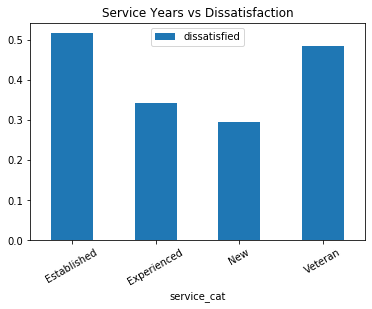

In [42]:
# Visualizing pivot table with bar plot
service_cat_pt.plot.bar(rot=30, title='Service Years vs Dissatisfaction', )


I observe that Veteran (11+ years) and Established (7-10 years) groups are the most dissatisfied which is around 50% of the groups resigning because of dissatisfaction. The least dissatisfied employees resigning are the newcomers which between 0-3 years in the job.

Also, there is pattern that the more years employees worked, it's more likely to have dissatisfaction while resigning.


## Age

Let's observe age column and then clean it. After we have a clean age data, it's ready to analyze the age factor in dissatisfation.

In [43]:
combined_update['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45          45
46-50            42
36-40            41
46  50          39
26-30            35
21  25          33
26  30          32
36  40          32
31  35          32
21-25            29
56 or older      29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

We have 55 missinng values which will not be used in our analysis. The column has age brackets with 5 years from "younger than 20" to "older than 61".

I will be categorizing them by 10 years age brackets. Also, I will put '20 or younger' values into 21-30 years bracket. The reason is there are only 10 people in this category and it's more likely they are mostly between 19-20 years old.

In [44]:
# Function to separate age into categories
def age_category(age):
    if pd.isnull(age):
        return np.nan
    elif str(age)[0] == '2':
        return '21-30'
    elif str(age)[0] == '3':
        return '31-40'
    elif str(age)[0] == '4':
        return '41-50'
    elif str(age)[0] == '5' or str(age)[0] == '6':
        return '51+'


In [45]:
# Creating new column to assign age brackets
combined_update['age_up'] = combined_update['age'].apply(age_category)

# Check if the age brackets are created in the new column
combined_update['age_up'].value_counts(dropna=False)

41-50    174
51+      149
21-30    139
31-40    134
NaN       55
Name: age_up, dtype: int64

In [46]:
# Creating pivot table
age_pt = pd.pivot_table(combined_update, index='age_up', values='dissatisfied')
age_pt

,dissatisfied
age_up,
21-30,0.352518
31-40,0.358209
41-50,0.379310
51+,0.422819


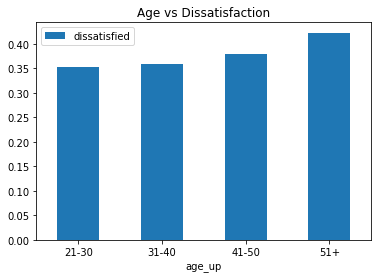

In [47]:
# Visualizing pivot table with bar plot
age_pt.plot.bar(rot=0, title='Age vs Dissatisfaction', )


Clearly seen that, as the age of employees is getting older, resigning due to the dissatisfaction is more likely.

## Institute

Additionally, I will analyze if more employees in DETE Survey or TAFE Survey end their employment because of dissatisfaction.

In [48]:
# Creating pivot table
institute_pt = pd.pivot_table(combined_update, aggfunc=[np.sum], index='institute', values='dissatisfied')
               

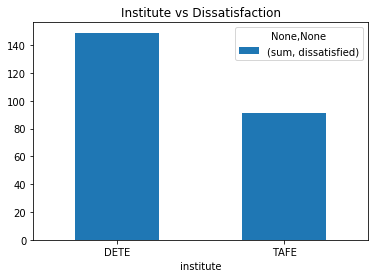

In [49]:
# Visualizing pivot table with bar plot
institute_pt.plot.bar(rot=0, title='Institute vs Dissatisfaction', )

In DETE Survey, there are more employees, almost 2 times, who resigned because of some kind of dissatisfaction compared to TAFE Survey.